## combine data

In [26]:
train_data = pd.read_csv('Training Data.csv')
train_data['Profession'] = train_data['Profession'].str.replace('_', ' ')
train_data.to_csv('Training Data.csv', index=False)

In [28]:
import pandas as pd

# Load training data and test data
train_data = pd.read_csv('Training Data.csv')
test_data = pd.read_csv('Test Data.csv')
sample_prediction_data = pd.read_csv('Sample Prediction Dataset.csv')

# Extract the 'Risk_Flag' feature from the sample prediction dataset
risk_flag = sample_prediction_data['Risk_Flag']

# Add 'Risk_Flag' as a new column to the test data
test_data['Risk_Flag'] = risk_flag

# Get the last ID in the training data
last_train_id = train_data['Id'].max()

# Calculate the starting ID for the test data
start_test_id = last_train_id + 1

# Adjust the IDs of the test data to continue from the last ID of the training data
test_data['Id'] = test_data['Id'] + start_test_id - 1

# Combine test data with training data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save combined dataset to CSV
combined_data.to_csv('Combined_Data.csv', index=False)


## Given input

In [15]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Training Data.csv');

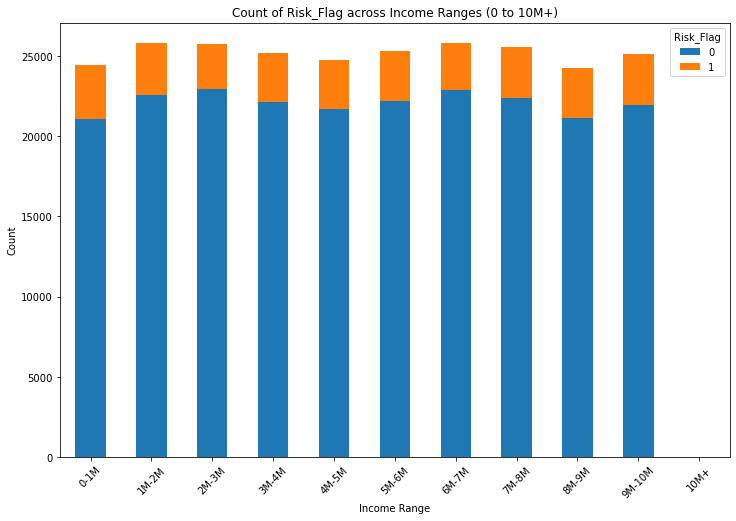


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                      21071               3384     6.226655
1M-2M                     22550               3232     6.977104
2M-3M                     22954               2810     8.168683
3M-4M                     22145               3055     7.248773
4M-5M                     21691               3066     7.074690
5M-6M                     22181               3116     7.118421
6M-7M                     22888               2896     7.903315
7M-8M                     22408               3159     7.093384
8M-9M                     21149               3107     6.806888
9M-10M                    21967               3171     6.927468
10M+                          0                  0          NaN


In [16]:
# Example DataFrame
out_data = data.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)


## on changed data

In [17]:
data1 = pd.read_csv('SWAGAT_INPUT_income_dataset_balanced.csv');

In [18]:
data1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34899,279810,9768762,66,1,single,rented,no,Comedian,Bhopal,Madhya Pradesh,1,13,0
34900,279821,9569607,51,13,single,rented,no,Engineer,Dehri[30],Bihar,12,13,1
34901,279851,9155705,35,12,single,rented,yes,Psychologist,Anand,Gujarat,12,12,1
34902,279933,9738992,35,17,single,rented,yes,Surveyor,Aurangabad,Maharashtra,13,12,1


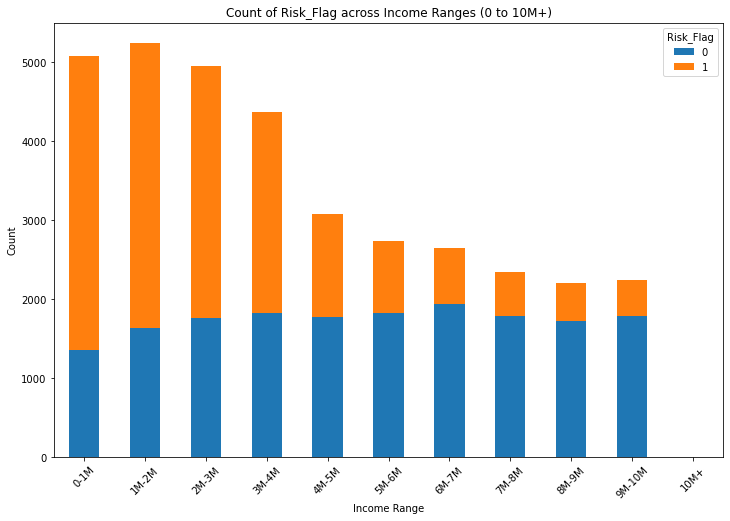


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                       1362               3717     0.366425
1M-2M                      1639               3602     0.455025
2M-3M                      1769               3180     0.556289
3M-4M                      1826               2540     0.718898
4M-5M                      1774               1311     1.353166
5M-6M                      1832                905     2.024309
6M-7M                      1943                702     2.767806
7M-8M                      1788                557     3.210054
8M-9M                      1731                481     3.598753
9M-10M                     1788                457     3.912473
10M+                          0                  0          NaN


In [19]:

# Example DataFrame
out_data = data1.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)



## unbalanced data


In [21]:
data1 = pd.read_csv('SWAGAT_INPUT_income_dataset_non_balanced.csv');
data1

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253091,279982,9867887,79,9,single,rented,no,Physician,Chapra,Bihar,4,12,0
253092,279983,9254833,63,13,single,rented,yes,Fashion Designer,Sambhal,Uttar Pradesh,10,10,0
253093,279996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
253094,279999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


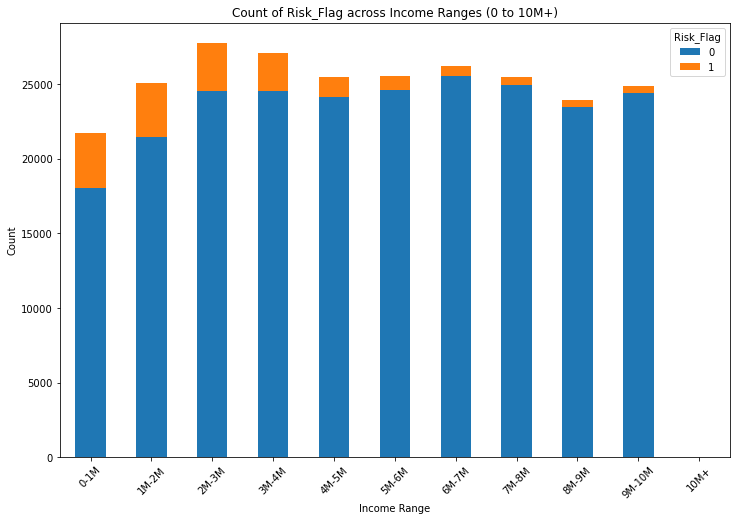


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                      18032               3717     4.851224
1M-2M                     21481               3602     5.963631
2M-3M                     24547               3180     7.719182
3M-4M                     24547               2540     9.664173
4M-5M                     24140               1311    18.413425
5M-6M                     24616                905    27.200000
6M-7M                     25504                702    36.330484
7M-8M                     24920                557    44.739677
8M-9M                     23480                481    48.814969
9M-10M                    24377                457    53.341357
10M+                          0                  0          NaN


In [22]:

# Example DataFrame
out_data = data1.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)

